## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# your code here
assert data.isnull().sum().sum() == 0  # нет пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

 ### Признаки
 - `количественные`: duration, amount, age
 - `бинарные`: telephone, foreign_worker, credit_risk
 - `порядковые`: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable
 - `категориальные`: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

In [4]:
data['credit_risk'].value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

In [5]:
# # бинаризация признаков:
# data['telephone'] = data['telephone'].apply(lambda x: 0 if x == 'no' else 1)
# data['foreign_worker'] = data['foreign_worker'].apply(lambda x: 0 if x == 'no' else 1)
# # 1 - good, 0 - bad
# data['credit_risk'] = data['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
# your code here
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
# your code here
a = data[(data['age'] < 30) & (data['housing'] == 'rent')].size / data[data['age'] < 30].size * 100
b = data[(data['age'] > 40) & (data['housing'] == 'rent')].size / data[data['age'] > 40].size * 100
print(int(a), '% клиентов моложе 30 лет и', int(b), '% старше 40 лет снимают жилье')

66 % клиентов моложе 30 лет и 68 % старше 40 лет снимают жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
# your code here
data[(data["foreign_worker"] == 1) & ((data["number_credits"] == '4-5') | (data["number_credits"] == '>= 6'))]
# у одного

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk


### Задание 6 (1 балл)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

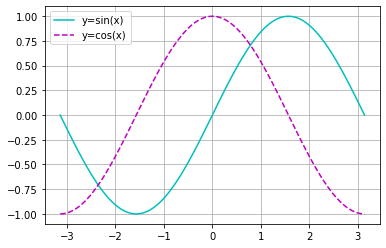

In [10]:
x = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), color='c', label='y=sin(x)')
ax.plot(x, np.cos(x), '--', color='m', label='y=cos(x)')
ax.legend()
ax.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [11]:
# your code here
data7 = data.groupby(['status', 'credit_risk'])['job'].count().unstack()
data7

credit_risk,bad,good
status,,
... < 0 DM,105,164
... >= 200 DM / salary for at least 1 year,46,348
0<= ... < 200 DM,14,49
no checking account,135,139


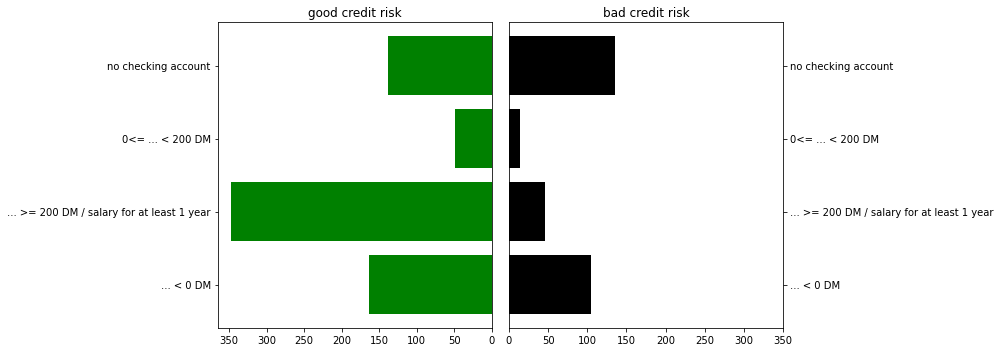

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].barh(data7.index, data7.good, color='g')
axes[1].barh(data7.index, data7.bad, color='black')

axes[0].invert_xaxis()
axes[1].yaxis.tick_right()

axes[0].set_title("good credit risk")
axes[1].set_title("bad credit risk")
plt.xlim([0, 350])

fig.tight_layout()

### Задание 8  (0.5 балла)

In [13]:
import seaborn as sns
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

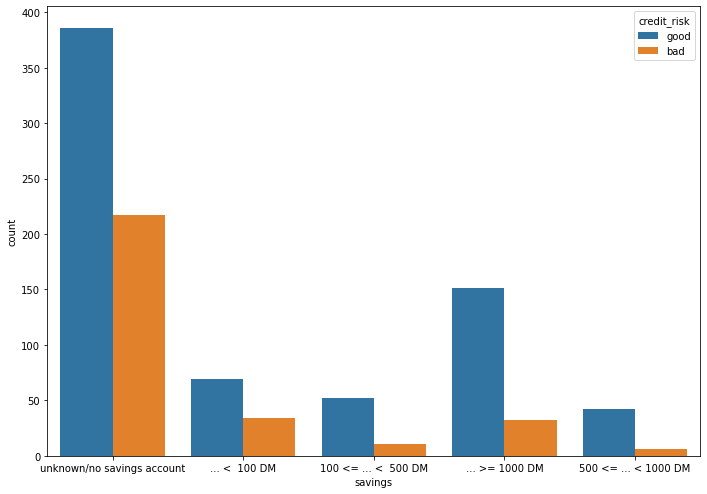

In [14]:
# your code here
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # (the size of A4 paper)

sns.countplot(data=data, x='savings', hue="credit_risk")
# Через seaborn в разы легче строить графики,
# которые дают одинаковый результат

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

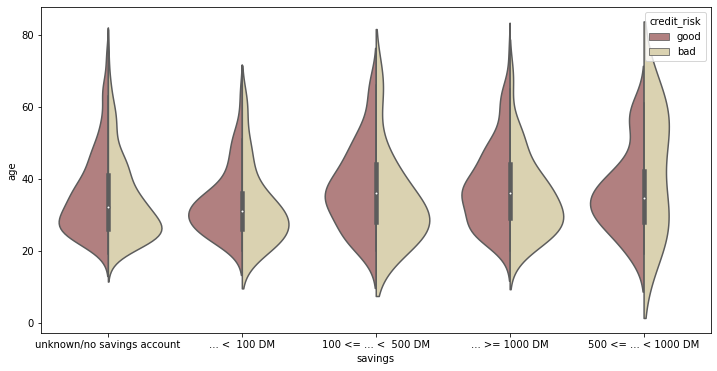

In [15]:
# your code here
plt.figure(figsize=(12,6))
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette='pink')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

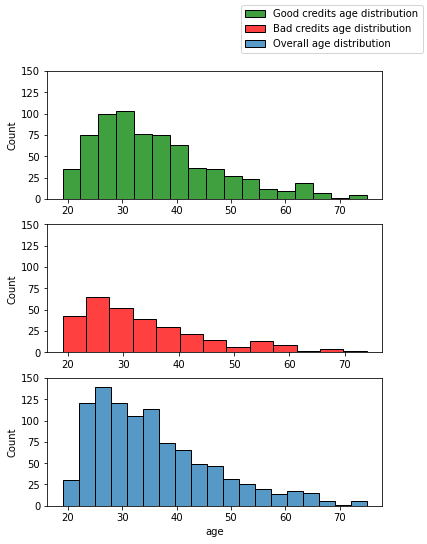

In [16]:
# your code here
fig, axes = plt.subplots(nrows=3, figsize=(6, 8))
sns.histplot(x="age", data=data[data["credit_risk"] == "good"], ax=axes[0], color='g').set(ylim=(0,150), xlabel='')
sns.histplot(x="age", data=data[data["credit_risk"] == "bad"], ax=axes[1], color='red').set(ylim=(0,150), xlabel='')
sns.histplot(x="age", data=data, ax=axes[2]).set(ylim=(0,150))
fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

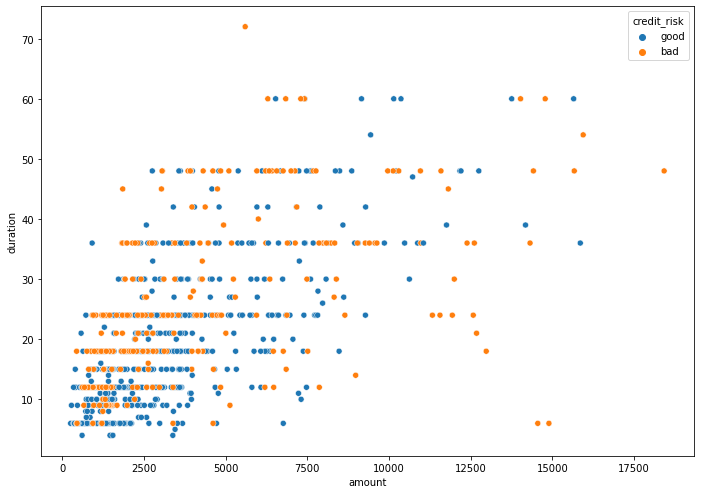

In [17]:
# your code here
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # (the size of A4 paper)

sns.scatterplot(x='amount', y='duration', data=data, hue='credit_risk')

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

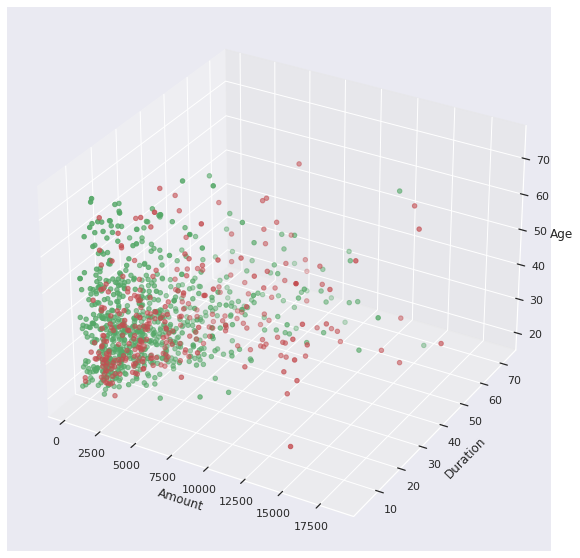

In [18]:
# your code here
sns.set(style = "darkgrid")
fig = plt.figure()
fig.set_size_inches(10, 10)

ax = fig.add_subplot(111, projection = '3d')

xg = data[data['credit_risk'] == "good"]['amount']
yg = data[data['credit_risk'] == "good"]['duration']
zg = data[data['credit_risk'] == "good"]['age']

xb = data[data['credit_risk'] == "bad"]['amount']
yb = data[data['credit_risk'] == "bad"]['duration']
zb = data[data['credit_risk'] == "bad"]['age']

ax.set_xlabel("Amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(xg, yg, zg, color='g')
ax.scatter(xb, yb, zb, color='r')


plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [19]:
# Рекавери:
# data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [20]:
# чистим от категориальных:
data.drop(["credit_history", "purpose", "personal_status_sex", "other_debtors", 
           "property", "housing", "job", "other_installment_plans"],
          axis=1, inplace=True)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0 to 2,no,no,good
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,3 or more,no,no,good
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0 to 2,no,no,good
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,3 or more,no,yes,good
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0 to 2,no,yes,good


In [21]:
# ориентируемся во всех возможных значениях всех полей
for i in data.columns:
    print(data[i].value_counts(), '\n')

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64 

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64 

1262    3
1258    3
1478    3
1275    3
1393    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: amount, Length: 923, dtype: int64 

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64 

1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... <

In [22]:
# заменяем первым способом: 
data['telephone'] = data['telephone'].apply(lambda x: 0 if x == 'no' else 1)
data['foreign_worker'] = data['foreign_worker'].apply(lambda x: 0 if x == 'no' else 1)
data['credit_risk'] = data['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)

In [23]:
# второй способ:
data["people_liable"] = (data["people_liable"] == "3 or more").astype(int)

# третий (кастомный)
to_replace = {
    "status": {"no checking account": 0, "... < 0 DM": 1,
                               "0<= ... < 200 DM": 2,
                               "... >= 200 DM / salary for at least 1 year": 3},
    "savings": {"unknown/no savings account": 0, "... <  100 DM": 1,
               "100 <= ... <  500 DM": 2, "500 <= ... < 1000 DM": 3,
               "... >= 1000 DM": 4},
    "employment_duration": {"unemployed": 0, "< 1 yr": 1, "1 <= ... < 4 yrs": 2,
                           "4 <= ... < 7 yrs": 3, ">= 7 yrs": 4},
    "installment_rate": {"< 20": 0, "20 <= ... < 25": 1, "25 <= ... < 35": 2,
                        ">= 35": 3},
    "present_residence": {"< 1 yr": 0, "1 <= ... < 4 yrs": 1,
                         "4 <= ... < 7 yrs": 2, ">= 7 yrs": 3},
    "number_credits": {"1": 0, "2-3": 1, "4-5": 2, ">= 6": 3}
}

data.replace(to_replace, inplace=True)

In [41]:
data.head()  # success


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [96]:
import random
def predict(Xtest: np.array) -> np.array:
    # your code here
    return (np.random.randint(0, 2, size=Xtest.size))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

ValueError: Found input variables with inconsistent numbers of samples: [250, 3000]